In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
loc = "data/ETFs/Stock Data/ticker_dimension.csv"
table = pd.read_csv(loc)
health_table = table[(table["sector"]=="Healthcare") & (table["universe"]=="sp500")]
health_table_1 = table[table["universe"]=="etf"]
tickers = health_table.loc[:,["ticker"]]
tickers



,ticker
0,A
2,ABBV
4,ABT
21,ALGN
28,AMGN
54,BAX
56,BDX
60,BIIB
66,BMY
70,BSX


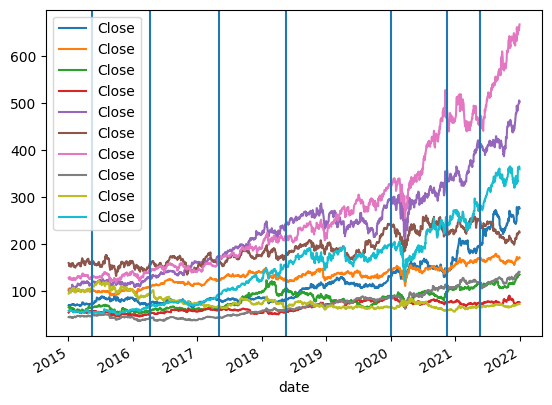

In [9]:
sp_loc = "data/ETFs/Stock Data/sp500_prices_all_since_2015.csv"
rel = "data/sp500_healthcare_companies.csv"
s_table = pd.read_csv(sp_loc, index_col=0, parse_dates=True)
r_table = pd.read_csv(rel)
s_table["date"] = s_table.index
r_table["ticker"] = r_table["ticket"]
first_r = s_table[s_table["date"]<="2022-01-01"]
second_r = s_table[s_table["date"]>="2022-01-01"]
figure, axes = plt.subplots()
for i in range(10):
    temp = pd.merge(first_r, r_table.iloc[[i],:], on = "ticker")
    temp.rename(columns={'Close': 'a'})
    temp.iloc[:,[3,9]].plot(x="date", ax=axes)
dates = "key_dates.csv"
dt = pd.read_csv(dates)
for i in range(50):
    x = dt.iloc[i,2]
    if (x >= "2015-01-01") & (x <= "2022-01-01"): 
        if(dt.iloc[i,1]=="Hardware"): plt.axvline(x)
plt.show()






In [10]:
dates = "./key_dates.csv"
dt = pd.read_csv(dates)
dt


,Name,Type,Date
0,Attention,Research,2014-09-14
1,NVIDIA Tesla K80,Hardware,2014-11-17
2,Google TPU v1,Hardware,2015-05-15
3,NVIDIA P100,Hardware,2016-04-05
4,Google TPU v2,Hardware,2017-05-01
5,RLHF,Research,2017-07-12
6,Google TPU v3,Hardware,2018-05-18
7,Transformers,Research,2018-06-18
8,Google TPU v4i,Hardware,2020-01-01
9,Long context,Research,2020-01-13


In [14]:
# after each key date, calculate the average return of the healthcare sector for the next 30 days and the next 60 days, and compare it to the average return of the healthcare sector for the previous 30 days and the previous 60 days. 
research = []
hardware = []
foundation = []

for row in dt.itertuples():
    date = row.Date
    type = row.Type
    avg_return_30_after = s_table[(s_table["date"]>date) & (s_table["date"]<=pd.to_datetime(date) + pd.Timedelta(days=30))].groupby("date")["Close"].mean().mean()
    avg_return_60_after = s_table[(s_table["date"]>date) & (s_table["date"]<=pd.to_datetime(date) + pd.Timedelta(days=60))].groupby("date")["Close"].mean().mean()
    avg_return_30_before = s_table[(s_table["date"]<date) & (s_table["date"]>=pd.to_datetime(date) - pd.Timedelta(days=30))].groupby("date")["Close"].mean().mean()
    avg_return_60_before = s_table[(s_table["date"]<date) & (s_table["date"]>=pd.to_datetime(date) - pd.Timedelta(days=60))].groupby("date")["Close"].mean().mean()
    if type == "Hardware":
        hardware.append((date, avg_return_30_after, avg_return_60_after, avg_return_30_before, avg_return_60_before))
    elif type == "Model Family":
        foundation.append((date, avg_return_30_after, avg_return_60_after, avg_return_30_before, avg_return_60_before))
    else:
        research.append((date, avg_return_30_after, avg_return_60_after, avg_return_30_before, avg_return_60_before))

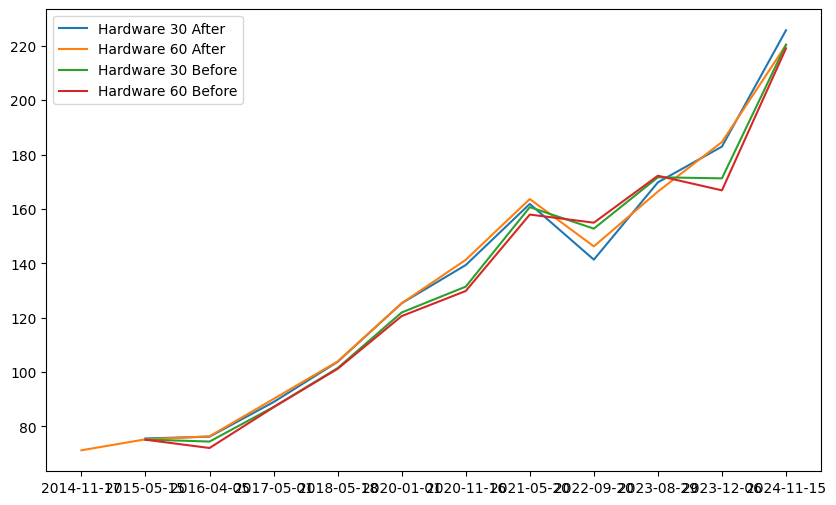

In [15]:
# graph for hardware, foundation, and research
hardware_df = pd.DataFrame(hardware, columns=["Date", "Avg Return 30 After", "Avg Return 60 After", "Avg Return 30 Before", "Avg Return 60 Before"])
foundation_df = pd.DataFrame(foundation, columns=["Date", "Avg Return 30 After", "Avg Return 60 After", "Avg Return 30 Before", "Avg Return 60 Before"])
research_df = pd.DataFrame(research, columns=["Date", "Avg Return 30 After", "Avg Return 60 After", "Avg Return 30 Before", "Avg Return 60 Before"])
plt.figure(figsize=(10, 6))
plt.plot(hardware_df["Date"], hardware_df["Avg Return 30 After"], label="Hardware 30 After")
plt.plot(hardware_df["Date"], hardware_df["Avg Return 60 After"], label="Hardware 60 After")
plt.plot(hardware_df["Date"], hardware_df["Avg Return 30 Before"], label="Hardware 30 Before")
plt.plot(hardware_df["Date"], hardware_df["Avg Return 60 Before"], label="Hardware 60 Before")
plt.legend()

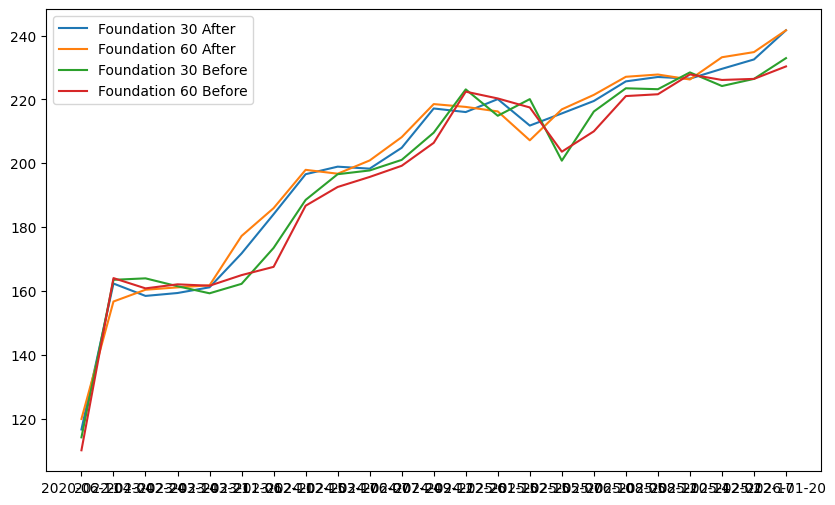

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(foundation_df["Date"], foundation_df["Avg Return 30 After"], label="Foundation 30 After")
plt.plot(foundation_df["Date"], foundation_df["Avg Return 60 After"], label="Foundation 60 After")
plt.plot(foundation_df["Date"], foundation_df["Avg Return 30 Before"], label="Foundation 30 Before")
plt.plot(foundation_df["Date"], foundation_df["Avg Return 60 Before"], label="Foundation 60 Before")
plt.legend()

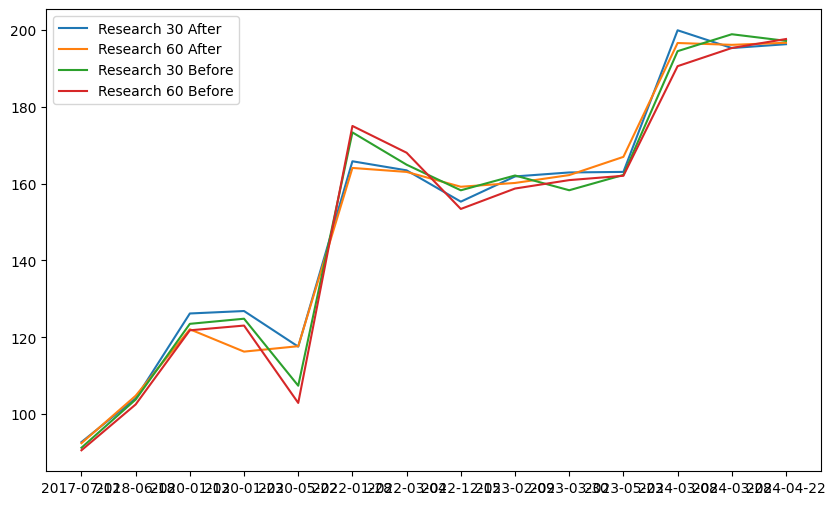

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(research_df["Date"], research_df["Avg Return 30 After"], label="Research 30 After")
plt.plot(research_df["Date"], research_df["Avg Return 60 After"], label="Research 60 After")
plt.plot(research_df["Date"], research_df["Avg Return 30 Before"], label="Research 30 Before")
plt.plot(research_df["Date"], research_df["Avg Return 60 Before"], label="Research 60 Before")
plt.legend()